# Image Recognation with MNIST dataset.

### This is acheived by using CNN implementation in keras with multiple layers

### __1-Importing Libraries__

In [1]:
# Importing pandas for I/0 ,Numpy for computational methods ,Matplotlib for plotting graphs &  tensorflow.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

### 2. Importing data from csv

In [2]:
train=pd.read_csv('train.csv') # Includes Training data with labels
test=pd.read_csv('test.csv')   # Includes Testing data.


### 3. Understanding data

In [3]:
train.describe() # Gives various quantities of info.

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [4]:
print("Training data size :",train.shape)
print("Test data size :",test.shape)
print("No of Training Eg :",train.shape[0])
print("No of Testing Eg :",test.shape[0])

Training data size : (42000, 785)
Test data size : (28000, 784)
No of Training Eg : 42000
No of Testing Eg : 28000


Below plot shows that training data is not skewed


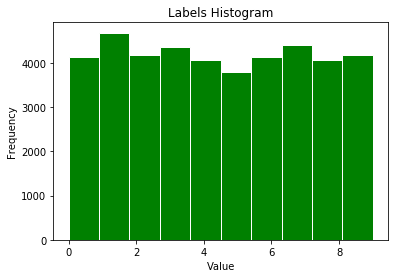

In [5]:
plt.hist(train['label'],color='g',edgecolor='white', linewidth=1)
plt.title('Labels Histogram')
plt.xlabel("Value")
plt.ylabel("Frequency")
fig = plt.gcf()
print("Below plot shows that training data is not skewed")

### 4. Converting data into X & Y , & normalizing the inputs.

In [6]:
Y=train['label']
X=train.drop(labels=['label'],axis=1)
X=X/255
test=test/255
X=X.values
test=test.values
Y=Y.values
X=X.reshape(-1,28,28,1)
test=test.reshape(-1,28,28,1)

### 5. Performing One Hot Encoding on labels of training Dataset.


In [7]:
from keras.utils import np_utils
Y=np_utils.to_categorical(Y,num_classes=10)


Using TensorFlow backend.


### 6. Making Train Test split for Testing the model.

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test  = train_test_split(X,Y,test_size = 0.05)


## Making Structure of CNN in keras.

In [9]:
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.callbacks import ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator

Model would be a Sequential model based on CNN with dropout regularization, Adam Optimizer, ReduceLROnPlateau Learning Rate optimization.

In [10]:
model=Sequential()
# Makes a model with Sequential Layers.
model.add(Conv2D(filters=32,kernel_size=(3,3),padding='Same',activation='relu',input_shape=(28,28,1)))
# Adds 32 3x3 Filters of Same padding & Relu Activation Function.
model.add(Conv2D(filters=64,kernel_size=(3,3),padding='valid',activation='relu'))
# Adds 64 3x3 Filters of valid padding & Relu Activation Function.
model.add(MaxPool2D(pool_size=(2,2)))
# Using maxPool layer of 2x2 to reduce size of input.
model.add(Dropout(0.25))
# Adds Dropout Layer
model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
# Adds 128 filters with 3x3 kernel size with Same padding & Relu activation function.
model.add(Conv2D(filters=256,kernel_size=(5,5),padding='valid',activation='relu'))
# Adds 256 5x5 Filters of valid padding & Relu Activation Function.
model.add(MaxPool2D(pool_size=(3,3)))
# Using maxPool layer of 3x3 to reduce size of input.
model.add(Dropout(0.25))
# Adds Dropout Regularization.
model.add(Conv2D(filters=512,kernel_size=(3,3),padding='valid',activation='relu'))
# Adds 512 3x3 Filters of valid padding & Relu Activation Function.
model.add(Flatten())
# Flattens the Matrix of 1x1x512.
model.add(Dense(256, activation = "relu"))
# Adding Dense ( Normal NN layer ) with 256 units & relu activation.
model.add(Dropout(0.5))
# Adds Dropout
model.add(Dense(128, activation = "relu"))
# Adding Dense ( Normal NN layer ) with 128 units & relu activation.
model.add(Dense(32, activation = "relu"))
# Adding Dense ( Normal NN layer ) with 32 units & relu activation.
model.add(Dense(10, activation = "softmax"))
# Adding Softmax layer with 10 units for final output.

In [11]:
#Using Adam Optimizer with default parameters as in Research Paper.
optimizer=optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

# Using Categorical Crossentropy as loss function.
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])
# ReduceLROnPlateau for Changing LR when Plateau is detected in loss graph.
lr_reduce = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)
epochs = 50 
batch_size = 85

__Doing Data Augmentation to increase data.__

In [12]:
datagenerator = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

In [13]:
datagenerator.fit(X_train)
history = model.fit_generator(datagenerator.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_test,Y_test),
                              verbose = 2, steps_per_epoch=X_train.shape[0] // batch_size
                              , callbacks=[lr_reduce])


Epoch 1/50
 - 36s - loss: 0.4625 - acc: 0.8440 - val_loss: 0.0604 - val_acc: 0.9829
Epoch 2/50
 - 23s - loss: 0.0996 - acc: 0.9719 - val_loss: 0.0385 - val_acc: 0.9900
Epoch 3/50
 - 23s - loss: 0.0736 - acc: 0.9792 - val_loss: 0.0355 - val_acc: 0.9924
Epoch 4/50
 - 23s - loss: 0.0639 - acc: 0.9825 - val_loss: 0.0273 - val_acc: 0.9938
Epoch 5/50
 - 23s - loss: 0.0560 - acc: 0.9849 - val_loss: 0.0343 - val_acc: 0.9929
Epoch 6/50
 - 23s - loss: 0.0495 - acc: 0.9864 - val_loss: 0.0305 - val_acc: 0.9910
Epoch 7/50
 - 23s - loss: 0.0471 - acc: 0.9871 - val_loss: 0.0312 - val_acc: 0.9943
Epoch 8/50
 - 23s - loss: 0.0460 - acc: 0.9868 - val_loss: 0.0317 - val_acc: 0.9948
Epoch 9/50
 - 23s - loss: 0.0437 - acc: 0.9891 - val_loss: 0.0247 - val_acc: 0.9957
Epoch 10/50
 - 23s - loss: 0.0384 - acc: 0.9896 - val_loss: 0.0217 - val_acc: 0.9962
Epoch 11/50
 - 23s - loss: 0.0399 - acc: 0.9892 - val_loss: 0.0303 - val_acc: 0.9948
Epoch 12/50
 - 23s - loss: 0.0361 - acc: 0.9906 - val_loss: 0.0282 - val_a

## Visualizing Data

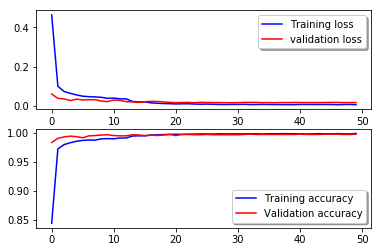

In [15]:
# Plotting a graph between Training Loss & validation loss
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['acc'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_acc'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [16]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

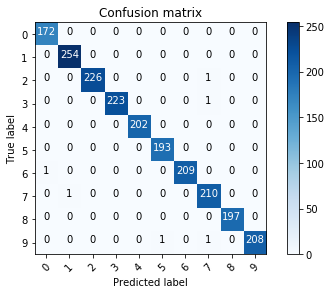

In [22]:
from sklearn.metrics import confusion_matrix
import itertools
Y_pred = model.predict(X_test)
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
Y_true = np.argmax(Y_test,axis = 1) 
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
plot_confusion_matrix(confusion_mtx, classes = range(10)) 


As we can see there are very few wrong Predictions being 6/2200

## You can now use the model to predict on test & submit result on kaggle
__Code for Predicting :__
results = model.predict(test)


__NOTE__ : Many parts of Notebook are inspired from other notebooks like [Yassine Ghouzam](https://www.kaggle.com/yassineghouzam/introduction-to-cnn-keras-0-997-top-6)
I've just learnt from them & then composed the Notebook.